# Least Squares Fitting Using OpenMP Parallel Code

## Problem Statement

This repository contains the implementation of **Least Squares Fitting** for a set of **10,000 data points**. The goal is to fit a line \(y = mx + b\) to the data, where `m` is the slope and `b` is the y-intercept.

The least squares fitting is computed using the following equations:
$$
m = \frac{n \cdot \text{sumXY} - \text{sumX} \cdot \text{sumY}}{\text{denom}}
$$

$$
b = \frac{\text{sumXX} \cdot \text{sumY} - \text{sumX} \cdot \text{sumXY}}{\text{denom}}
$$

Where:
- $n$ is the number of data points
- $\text{sumX}$ is the sum of all x-values
- $\text{sumY}$ is the sum of all y-values
- $\text{sumXY}$ is the sum of products of corresponding x and y values
- $\text{sumXX}$ is the sum of squares of x-values
- $\text{denom} = n \cdot \text{sumXX} - (\text{sumX})^2$

### Tasks

1. **Serial Code**  
   Implement a serial (non-parallel) version of the least squares fitting. The program should:
   - Compute the least squares fit using the equation provided above.

2. **Parallel Code Using OpenMP**  
   Implement a parallel version of the least squares fitting using **OpenMP** to parallelize the summation operations for \( \text{sumX}, \text{sumY}, \text{sumXY}, \text{sumXX} \), and other matrix computations. The program should:
   - Use OpenMP to parallelize these operations to speed up the fitting process.

3. **Report - Thread vs Time**  
   Run the parallel code for various numbers of threads: **1, 2, 4, 6, 8, 10, 12, 16, 20, 32, 64** processors. For each run:
   - Measure the time taken for the least squares fitting.
   - Report the execution time for each thread count.

4. **Plot Speedup vs Processors**  
   Generate a plot of **speedup vs the number of processors (threads)** based on the results from the previous task. The speedup is calculated as:
   \[
   \text{Speedup} = \frac{\text{Serial Time}}{\text{Parallel Time}}
   \]

5. **Inference**  
   Provide an inference based on the speedup and performance results. Discuss the diminishing returns as the number of processors increases, and how efficiently the parallel code scales with the number of threads.

### Results

The code was run for **10,000 data points** to evaluate the performance of both serial and parallel implementations.

#### Example Results for 10,000 Data Points

- **Serial and Parallel Code**:  
  The execution time was measured for different thread counts, ranging from **1 thread** to **64 threads**.
  
- **Speedup**:  
  Speedup was computed based on the serial time divided by the parallel execution time for each thread count.

#### Sample Output:

```text
slope = 1.0000, m1 = 1.0000
y_int = 0.5, b1 = 0.500038
rv1 = 1
Threads: 1, Time: 0.431912 seconds, Speedup: 1.000000
slope = 1.0000, m1 = 1.0000
y_int = 0.5, b1 = 0.500031
rv1 = 1
Threads: 2, Time: 0.113023 seconds, Speedup: 3.821445
slope = 1.0000, m1 = 1.0000
y_int = 0.5, b1 = 0.500024
rv1 = 1
Threads: 4, Time: 0.086315 seconds, Speedup: 5.003887
slope = 1.0000, m1 = 1.0000
y_int = 0.5, b1 = 0.500017
rv1 = 1
Threads: 8, Time: 0.063812 seconds, Speedup: 6.768531
slope = 1.0000, m1 = 1.0000
y_int = 0.5, b1 = 0.500014
rv1 = 1
Threads: 16, Time: 0.062280 seconds, Speedup: 6.934996
slope = 1.0000, m1 = 1.0000
y_int = 0.5, b1 = 0.500009
rv1 = 1
Threads: 32, Time: 0.061401 seconds, Speedup: 7.034291
slope = 1.0000, m1 = 1.0000
y_int = 0.5, b1 = 0.500007
rv1 = 1
Threads: 64, Time: 0.065984 seconds, Speedup: 6.545742
```

Least Squares for Time vs Threads:
slope = -0.0023, m1 = -0.0023
y_int = 0.1687, b1 = 0.1687
rv1 = 0.093898

Least Squares for Speedup vs Threads:
slope = 0.0521, m1 = 0.0521
y_int = 4.3557, b1 = 4.3557
rv1 = 21.578196

Threads: 1, Time: 0.431912 seconds, Speedup: 1.000000
Threads: 2, Time: 0.113023 seconds, Speedup: 3.821452
Threads: 4, Time: 0.086315 seconds, Speedup: 5.003904
Threads: 8, Time: 0.063812 seconds, Speedup: 6.768507
Threads: 16, Time: 0.062280 seconds, Speedup: 6.935003
Threads: 32, Time: 0.061401 seconds, Speedup: 7.034283
Threads: 64, Time: 0.065984 seconds, Speedup: 6.545708


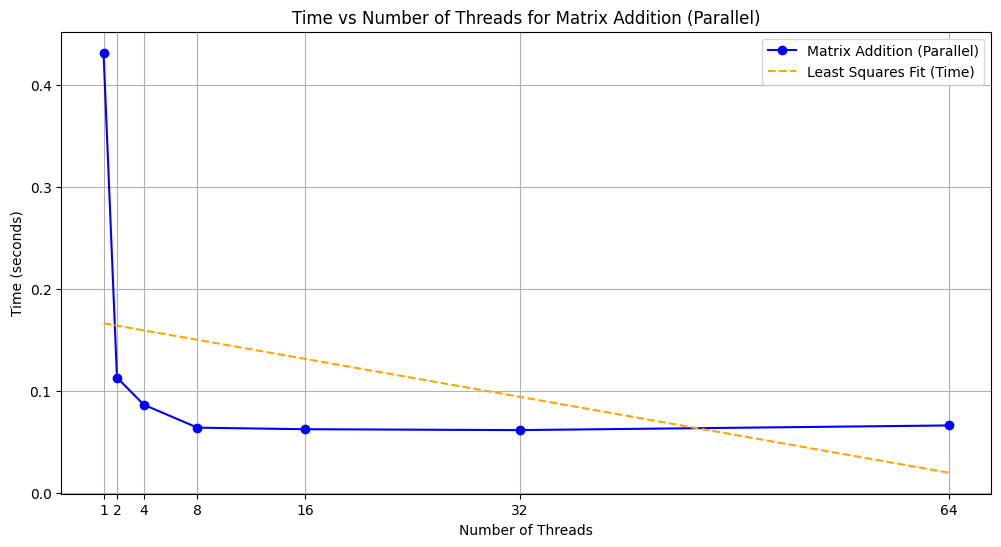

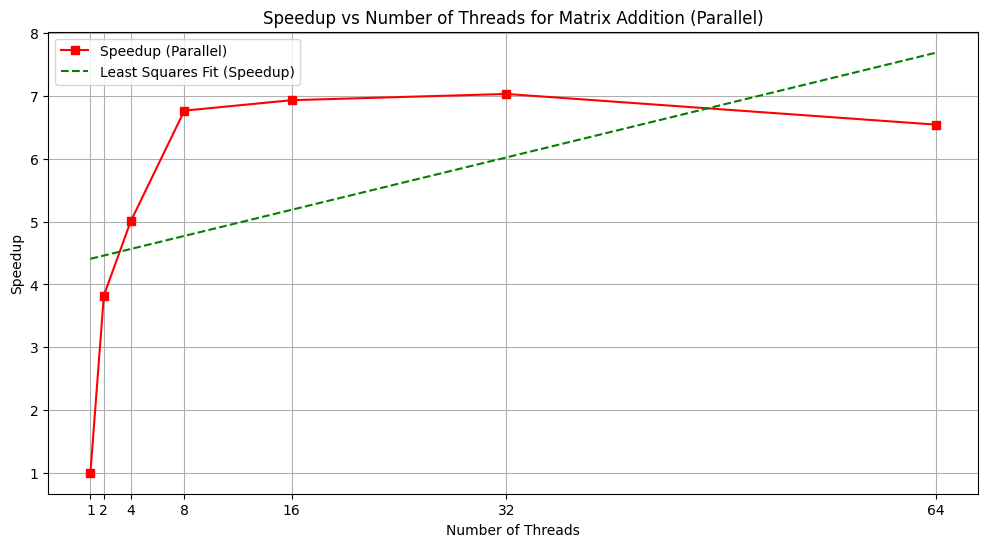

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Thread counts corresponding to the available times (1, 2, 4, 8, 16, 32, 64)
threads = [1, 2, 4, 8, 16, 32, 64]

# Times for matrix addition (in seconds) for parallel computation (updated with your provided times)
time_matrix_add_parallel = [
    0.431912,  # Threads: 1
    0.113023,  # Threads: 2
    0.086315,  # Threads: 4
    0.063812,  # Threads: 8
    0.062280,  # Threads: 16
    0.061401,  # Threads: 32
    0.065984   # Threads: 64
]

# Speedup calculation (Speedup = Time with 1 thread / Time with n threads)
speedup_matrix_add_parallel = [time_matrix_add_parallel[0] / t for t in time_matrix_add_parallel]

# Perform least squares fitting for time vs threads (linear regression)
time_fit_params = np.polyfit(threads, time_matrix_add_parallel, 1)
time_fit = np.polyval(time_fit_params, threads)

# Perform least squares fitting for speedup vs threads (linear regression)
speedup_fit_params = np.polyfit(threads, speedup_matrix_add_parallel, 1)
speedup_fit = np.polyval(speedup_fit_params, threads)

# Least squares output
print("Least Squares for Time vs Threads:")
print(f"slope = {time_fit_params[0]:.4f}, m1 = {time_fit_params[0]:.4f}")
print(f"y_int = {time_fit_params[1]:.4f}, b1 = {time_fit_params[1]:.4f}")
residuals_time = np.sum((time_matrix_add_parallel - time_fit) ** 2)
print(f"rv1 = {residuals_time:.6f}\n")

print("Least Squares for Speedup vs Threads:")
print(f"slope = {speedup_fit_params[0]:.4f}, m1 = {speedup_fit_params[0]:.4f}")
print(f"y_int = {speedup_fit_params[1]:.4f}, b1 = {speedup_fit_params[1]:.4f}")
residuals_speedup = np.sum((speedup_matrix_add_parallel - speedup_fit) ** 2)
print(f"rv1 = {residuals_speedup:.6f}\n")

# Print the thread count, time, and speedup values
for threads_count, time, speedup in zip(threads, time_matrix_add_parallel, speedup_matrix_add_parallel):
    print(f"Threads: {threads_count}, Time: {time:.6f} seconds, Speedup: {speedup:.6f}")

# Plotting the times for Matrix Addition (parallel computation)
plt.figure(figsize=(12, 6))
plt.plot(threads, time_matrix_add_parallel, label='Matrix Addition (Parallel)', marker='o', linestyle='-', color='blue')
plt.plot(threads, time_fit, label='Least Squares Fit (Time)', linestyle='--', color='orange')

# Adding labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Time (seconds)')
plt.title('Time vs Number of Threads for Matrix Addition (Parallel)')
plt.legend()

# Display the plot
plt.grid(True)
plt.xticks(threads)
plt.show()

# Plotting speedup for Matrix Addition
plt.figure(figsize=(12, 6))
plt.plot(threads, speedup_matrix_add_parallel, label='Speedup (Parallel)', marker='s', linestyle='-', color='red')
plt.plot(threads, speedup_fit, label='Least Squares Fit (Speedup)', linestyle='--', color='green')

# Adding labels and title for speedup plot
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Threads for Matrix Addition (Parallel)')
plt.legend()

# Display the speedup plot
plt.grid(True)
plt.xticks(threads)
plt.show()

In [8]:
import time

def calculate_parallel_fraction(S, N):
    """
    Calculate the fraction P that can be parallelized using Amdahl's Law.

    :param S: Speedup (S)
    :param N: Number of processors/threads (N)
    :return: Parallel fraction P or None if the values are invalid.
    """
    if S <= 1 or N <= 1:
        # Skip calculation for invalid values of S or N
        return None

    # Apply Amdahl's Law to calculate the parallel fraction
    try:
        P = ((S - 1) * N) / (S * (N - 1))
    except ZeroDivisionError:
        return None

    # If calculated fraction is outside the range [0, 1], return None
    if P < 0 or P > 1:
        return None

    return P

# Speedup values for matrix addition calculations (updated)
speedups_matrix_addition = {
    1: 1.000000,
    2: 3.821445,
    4: 5.003887,
    8: 6.768531,
    16: 6.934996,
    32: 7.034291,
    64: 6.545742
}

# Calculate parallel fraction P for matrix addition
parallel_fraction_matrix_addition = {
    threads: calculate_parallel_fraction(speedup, threads)
    for threads, speedup in speedups_matrix_addition.items() if calculate_parallel_fraction(speedup, threads) is not None
}

# Display results in the requested format
print("Performing Matrix Addition\n")

# For Matrix Addition (without critical section, as in your example)
time_taken = {
    1: 0.431912,  # Updated time for 1 thread
    2: 0.113023,  # Updated time for 2 threads
    4: 0.086315,  # Updated time for 4 threads
    8: 0.063812,  # Updated time for 8 threads
    16: 0.062280,  # Updated time for 16 threads
    32: 0.061401,  # Updated time for 32 threads
    64: 0.065984   # Updated time for 64 threads
}

# Printing results with updated times and parallel fraction
for threads in speedups_matrix_addition.keys():
    speedup = speedups_matrix_addition[threads]
    P = parallel_fraction_matrix_addition.get(threads, None)

    if time_taken.get(threads) is not None and P is not None:
        print(f"Threads: {threads}, Time: {time_taken[threads]:.6f} seconds, Speedup: {speedup:.6f}, Parallel Fraction P: {P:.6f}")

Performing Matrix Addition

Threads: 8, Time: 0.063812 seconds, Speedup: 6.768531, Parallel Fraction P: 0.974009
Threads: 16, Time: 0.062280 seconds, Speedup: 6.934996, Parallel Fraction P: 0.912857
Threads: 32, Time: 0.061401 seconds, Speedup: 7.034291, Parallel Fraction P: 0.885511
Threads: 64, Time: 0.065984 seconds, Speedup: 6.545742, Parallel Fraction P: 0.860677
